# Elevate Chat & AI Applications: Mastering Azure Cognitive Search with Vector Storage for LLM Applications with Langchain



In a realm where Chat and AI applications thrive on data-driven interactions, the power of efficient document management and retrieval cannot be overstated. Welcome to our project portfolio series, “Elevate Chat & AI Applications: Mastering Azure Cognitive Search with Vector Storage.” Join us on an enlightening journey where we unravel the potential of Azure Cognitive Search’s new preview features, designed to empower your generative AI and chat applications with the prowess of vector storage.

If you came looking for code only, just go to the code folder, code is very well documented, if you dont understand something, this portfolio project is split into several parts for your uinderstanding

## Part 1 — Architecture: Building the Foundation for AI-Powered Conversations



### Introduction
In order to be able to empower chatbot applications over your documents the most important part is to store vector embeddings of those documents.

### What are vector embeddings?

Also known as vector representations or word embeddings, are a fundamental concept in natural language processing and machine learning. They are numerical representations of words, phrases, sentences, or even larger pieces of text, designed to capture semantic and contextual relationships between them in a high-dimensional space.

### Azure Cognitive Search

Azure Cognitive Search is a cloud-based search service provided by Microsoft Azure. It allows you to build powerful and customizable search solutions for your applications, websites, or enterprise data using advanced search capabilities. Recently (June 2023) Microsoft announced on public preview the support for Vector Storage and Vector Search in Azure Cognitive Search, in previous posts I used Pinecone as Vector Database, and there are other providers, however having everything inside Azure is a no-brainer.

### Architecture
Some concepts before:

**Indexes:** Its where we store data, basically indexes are json text files with the content of the files, but when using Vector Storage, these indexes can also contain vector embeddings.

**Indexers:** Its the software component which goes to a datasource to fetch new or modified files and then puts them into an index as text/json documents.

**Data Sources:** Its just the connection to the final storage, in our case the files are in blob storage, but there are several options available, like Azure SQL, CosmosDB, etc.

**Skillsets:** Skill sets are part of Indexers, they are pieces of software that processes documents in a pipeline fashion, after the text from a document has been retrieved you can plug and play skillsets which do other tasks, like generate text from images, take OCR text from pictures, etc, etc. Microsoft has developed for us several skills for us to reuse, however the interesting part its that we can develop our own custom skills.

**Knowledge Store:** A knowledge store is a data sink created by a Cognitive Search enrichment pipeline that stores AI-enriched content in tables and blob containers in Azure Storage for independent analysis or downstream processing in non-search scenarios like knowledge mining. Projections are the physical tables, objects, and files in a knowledge store that accept content from a Cognitive Search AI enrichment pipeline. If you’re creating a knowledge store, defining and shaping projections is most of the work2. You can learn more about creating a knowledge store in Azure Cognitive Search by following this quickstart guide. In the context of our Architecture the Knowledge store will contain our chunks of text with the vector embeddings, a Knowledge Store is backed by a storage account, this storage account then will be used for the chunk indexer to create the chunk indexes (where our vector embeddings will reside)

### Diagram

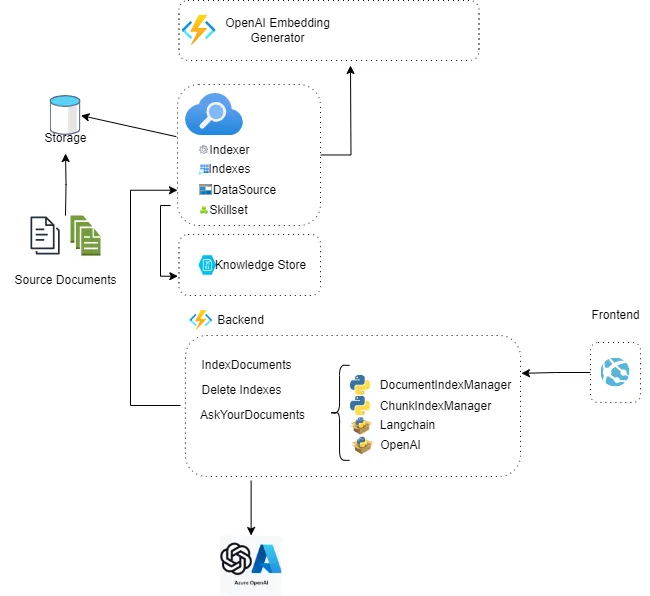

**Explanation:** We have documents which are stored in blob storage (left of the diagram), then we have Azure Cogntive Search which takes those files with an indexer, processes the text and created the vector embeddings with a custom skillset which uses the Open AI Embedding Generator, after processing the processed results are stored in Indexes for later retrieval. The chunks and embeddings are generated in the process as projections and stored in a Knowledge Store (Blob Storage), data sources are created as the connection betweeh the blob storage/knowledge store and the indexers. The Backend its the core of the solution (from code perspective and its explained below)

The solution is split into several software engineered components which contribute to the entire process. The components developed by us are actually just 3, the rest of the components in our diagram are cloud components which support the entire solution (and these are explained above).

#### OpenAI Embedding Generator

Its an Azure Function which will be called for every single document indexed, this function gets text, and returns embedding vectors. The function is used as part of an Azure Cogntive Search Skillset

#### Backend:

**IndexDocuments:** This is An Azure Function HTTP Trigger which responsability is to create the Azure Cognitive Search infrastructure to make all happen, it will create the indexes, one for plain text documents and another for vector storage, it will create the data source, the indexer, the skill set, and of course it will wait for the indexer to finish, at the end it will return all the resources created.

**DeleteDocuments:** It will delete all the resources created by the previous function: Indexes, Indexers, Skillsets and Datasources. It wont delete the source of documents (Blob Storage)

**AskYourDocuments:** This backend function its the one responsibly to receive a question and generate an answer back, it uses Langchain framework to encapsulate the complexity of building LLM Applications, it also uses Azure Cognitive Search to find relevant chunks of documents from the vector embeddings, and it also uses Azure OpenAI to generate an answer in English (or any supported language) based on the context received from the chunks found based on the question asked by the user.

#### Frontend:

Its an Azure Web Application developed in Streamlit, which functionality is only to call the backend REST API, more spefically the AskYourDocuments Azure Function, with a query and then render in screen a response back.

## Part 1 -- Embedding Generator for Cognitive Search: Revolutionizing Conversational Context

In this immersive installment, we plunge into the heart of vector-based search with the Embedding Generator for Cognitive Search. Brace yourself to witness how vectors wield their magic, transforming conversations into high-dimensional representations. Discover how this transformative capability ignites contextual understanding, enabling your chat and AI applications to engage with users at a whole new level of sophistication.



## Part 2 -- Configuration Deep Dive: Empowering Conversations with Vector Storage

Navigating the intricacies of vector storage has never been more accessible. Join us as we guide you through the intricate setup of indexes, indexers, datasources, knowledge stores, and skillsets, all tailored to amplify the conversational prowess of your applications. By the end of this post, you’ll be equipped to seamlessly integrate vector storage, laying the foundation for enriched chatbot experiences.

## Part 3 -- Backend Brilliance: Integrating Langchain and Cognitive Search for AI-Powered Chat

This post dives into the application realm, showcasing how vector storage transforms the backend of your chat and AI applications. Unveil the synergy between Langchain, a potent language processing tool, and Cognitive Search. Immerse yourself in the world of vector-based language understanding, and witness how it propels your application’s backend, enabling nuanced and contextually aware conversations.

## Part 4 -- Frontend Flourish: Craft Immersive AI Experiences Using Streamlit

As we approach the finale, we shift our focus to the frontend. Discover how Streamlit, the dynamic Python library, can breathe life into your AI applications. Build an engaging user interface that brings vector-powered insights to life, visually enhancing user interactions and experiences. Unlock the potential to captivate users with visually appealing dashboards that showcase the transformative impact of vector storage.

## Conclusion

Embark on an empowering journey with my portfolio project series, “Elevate Chat & AI Applications: Mastering Azure Cognitive Search with Vector Storage.” Whether you’re a seasoned AI enthusiast or a curious conversationalist, this series promises to equip you with the knowledge and tools to elevate your chat and AI applications. Stay tuned as we delve into the depths of vector storage’s capabilities, enabling you to craft conversational experiences that are intuitive, contextually rich, and undeniably transformative.